In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\20109\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\20109\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
df = pd.read_csv("depression_dataset_reddit_cleaned.csv")
print("Dataset shape:", df.shape)
print(df.head())
print("\nClass Distribution:\n", df['is_depression'].value_counts())


Dataset shape: (7731, 2)
                                          clean_text  is_depression
0  we understand that most people who reply immed...              1
1  welcome to r depression s check in post a plac...              1
2  anyone else instead of sleeping more when depr...              1
3  i ve kind of stuffed around a lot in my life d...              1
4  sleep is my greatest and most comforting escap...              1

Class Distribution:
 is_depression
0    3900
1    3831
Name: count, dtype: int64


In [12]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|@\S+|#\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['clean_text'].astype(str).apply(clean_text)


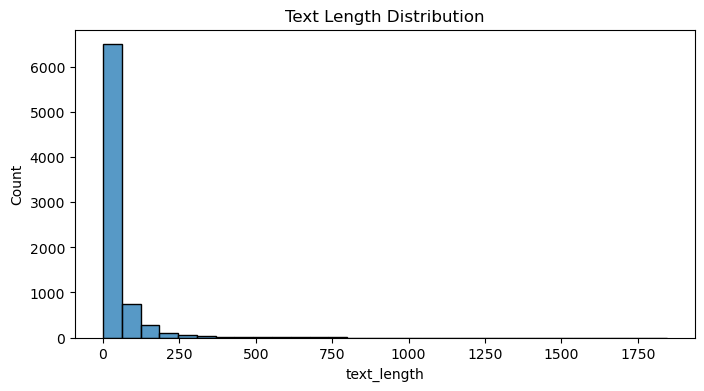

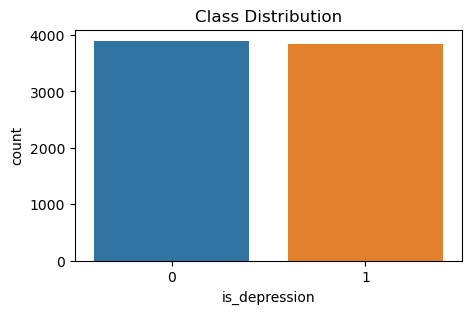

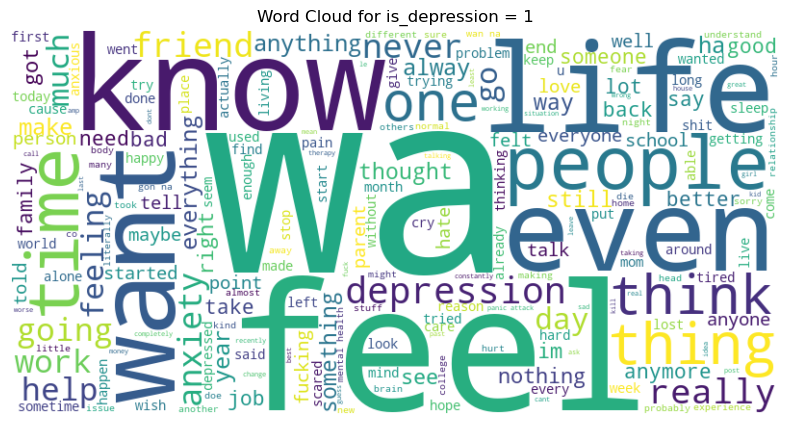

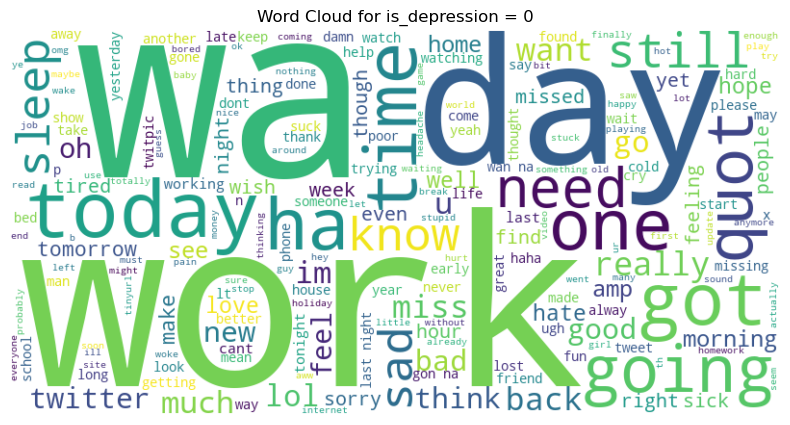

In [13]:
df['text_length'] = df['clean_text'].apply(lambda x: len(x.split()))

# Text Length
plt.figure(figsize=(8,4))
sns.histplot(df['text_length'], bins=30)
plt.title("Text Length Distribution")
plt.show()

# Label Distribution
plt.figure(figsize=(5,3))
sns.countplot(x='is_depression', data=df)
plt.title("Class Distribution")
plt.show()

# Word Clouds
for label in df['is_depression'].unique():
    text = " ".join(df[df['is_depression'] == label]['clean_text'])
    if text.strip():
        wc = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for is_depression = {label}")
        plt.show()


In [14]:
df['avg_word_length'] = df['clean_text'].apply(lambda x: np.mean([len(w) for w in x.split()]) if x else 0)
df['num_digits'] = df['clean_text'].apply(lambda x: sum(c.isdigit() for c in x))
df['num_caps'] = df['clean_text'].apply(lambda x: sum(1 for w in x.split() if w.isupper()))

# Remove empty rows
df = df[df['clean_text'].str.strip() != ''].copy()


In [15]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_text = tfidf.fit_transform(df['clean_text'])

# Combine with engineered features
from scipy.sparse import hstack
X_numeric = df[['text_length', 'avg_word_length', 'num_digits', 'num_caps']].values
X = hstack([X_text, X_numeric])

y = df['is_depression']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Logistic Regression Results
Accuracy: 0.9611901681759379
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       776
           1       1.00      0.92      0.96       770

    accuracy                           0.96      1546
   macro avg       0.96      0.96      0.96      1546
weighted avg       0.96      0.96      0.96      1546



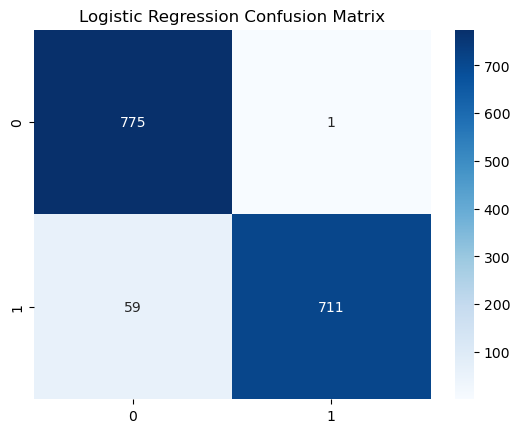


Naive Bayes Results
Accuracy: 0.8745148771021992
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       776
           1       0.98      0.76      0.86       770

    accuracy                           0.87      1546
   macro avg       0.89      0.87      0.87      1546
weighted avg       0.89      0.87      0.87      1546



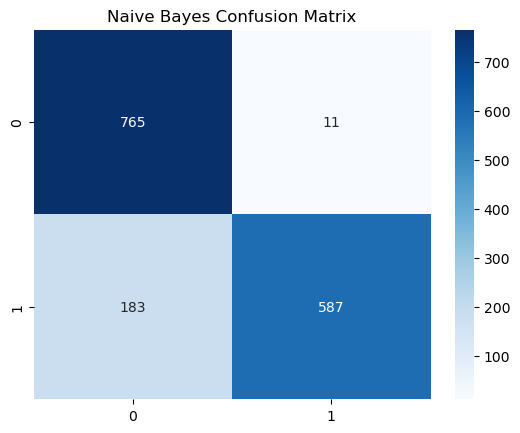


SVM Results
Accuracy: 0.8641655886157826
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       776
           1       0.99      0.74      0.84       770

    accuracy                           0.86      1546
   macro avg       0.89      0.86      0.86      1546
weighted avg       0.89      0.86      0.86      1546



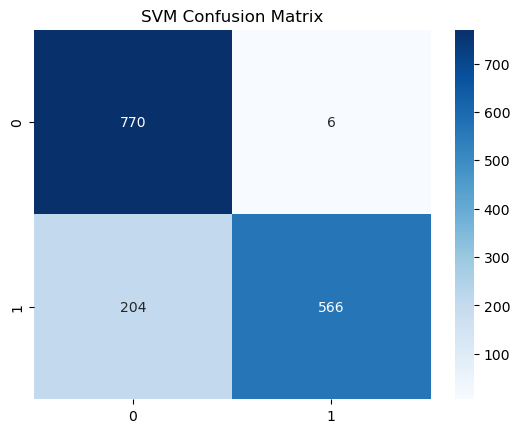

In [17]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Results")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.show()


In [18]:
params = {'C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), params, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Score (CV Accuracy):", grid.best_score_)


Best Parameters: {'C': 10}
Best Score (CV Accuracy): 0.9623216729063163


In [19]:
pip install streamlit


  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/13/e6/69fcbae3dd2fcb2f54283a7cbe03c8b944b79997f1b526984f91d4796a02/streamlit-1.45.1-py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/aa/f3/0b6ced594e51cc95d8c1fc1640d3623770d01e4969d29c0bd09945fafefa/altair-5.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.5.0 from https://files.pythonhosted.org/packages/10/cb/f2ad4230dc2eb1a74edf38f1a38b9b52277f75bef262d8908e60d957e13c/blinker-1.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for gitpython!=3.1.19,<4,>=3.0.7 from https://files.pythonhosted.org/packages/1d/9a/4114a9057db2f1462d5c8f8390ab7383925fe1ac012eaa42402ad65c2963/GitPython-3.1.44-py3-none-any.whl.metadata
  Obtaining dependency information for pydeck<1,>=0.8.0b4 from https://files.pythonhosted.org/packages/ab/4c/b888e6cf58bd9db9c93f40d1c6be8283ff49d88919231afe93

In [20]:
import joblib

# Save model and vectorizer
joblib.dump(model, "depression_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [32]:
import streamlit as st
import joblib
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Load model and vectorizer
model = joblib.load("depression_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Preprocessing function (match your training code)
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|@\S+|#\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

# Streamlit UI
st.title("🧠 Mental Health Text Classifier")
st.markdown("Enter a Reddit-style post to predict if it reflects signs of **depression**.")

user_input = st.text_area("Your Reddit post:", "")

import numpy as np
from scipy.sparse import hstack

if st.button("Analyze"):
    if user_input.strip() == "":
        st.warning("Please enter some text.")
    else:
        cleaned = clean_text(user_input)

        # Compute numeric features on cleaned text
        text_length = len(cleaned.split())
        avg_word_length = np.mean([len(w) for w in cleaned.split()]) if cleaned else 0
        num_digits = sum(c.isdigit() for c in cleaned)
        num_caps = sum(1 for w in cleaned.split() if w.isupper())

        # Vectorize cleaned text
        vectorized = vectorizer.transform([cleaned])

        # Combine TF-IDF vector with numeric features
        numeric_features = np.array([[text_length, avg_word_length, num_digits, num_caps]])
        vectorized_full = hstack([vectorized, numeric_features])

        # Predict using combined features
        prediction = model.predict(vectorized_full)[0]
        label = "🟢 Not Depressed" if prediction == 0 else "🔴 Depressed"

        st.subheader(f"Prediction: {label}")



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\20109\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2025-05-17 01:13:10.317 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 01:13:10.318 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 01:13:10.320 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 01:13:10.320 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 01:13:10.321 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 01:13:10.321 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 01:13:10.322 Thread 'MainThread': missing ScriptRunContext! This warning can 

In [23]:
!streamlit run app.py


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [27]:
import os
print(os.getcwd())


C:\Users\20109\Downloads\Depression Reddit Dataset (Cleaned)


In [33]:
app_code = """
import streamlit as st
import joblib
import re
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Load model and vectorizer
model = joblib.load("depression_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\\S+|www\\S+|@\\S+|#\\S+", "", text)
    text = re.sub(r"[^a-z\\s]", "", text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

st.title("🧠 Mental Health Text Classifier")
st.markdown("Enter a Reddit-style post to check for signs of depression.")

user_input = st.text_area("Your Reddit post:")

import numpy as np
from scipy.sparse import hstack

if st.button("Analyze"):
    if user_input.strip() == "":
        st.warning("Please enter some text.")
    else:
        cleaned = clean_text(user_input)

        # Compute numeric features on cleaned text
        text_length = len(cleaned.split())
        avg_word_length = np.mean([len(w) for w in cleaned.split()]) if cleaned else 0
        num_digits = sum(c.isdigit() for c in cleaned)
        num_caps = sum(1 for w in cleaned.split() if w.isupper())

        # Vectorize cleaned text
        vectorized = vectorizer.transform([cleaned])

        # Combine TF-IDF vector with numeric features
        numeric_features = np.array([[text_length, avg_word_length, num_digits, num_caps]])
        vectorized_full = hstack([vectorized, numeric_features])

        # Predict using combined features
        prediction = model.predict(vectorized_full)[0]
        label = "🟢 Not Depressed" if prediction == 0 else "🔴 Depressed"

        st.subheader(f"Prediction: {label}")

"""

# Save it
with open("app.py", "w", encoding="utf-8") as f:

    f.write(app_code)

print("✅ app.py has been saved in:", os.getcwd())


✅ app.py has been saved in: C:\Users\20109\Downloads\Depression Reddit Dataset (Cleaned)


In [34]:
import os
print(os.getcwd())


C:\Users\20109\Downloads\Depression Reddit Dataset (Cleaned)


In [35]:
!pip install streamlit
